<a href="https://colab.research.google.com/github/hazzo77/My_portfolio_-projects/blob/main/AlAbbasi_H_Emplyee_Attrition_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Understanding Business Case
2. Variable Description
3. Data Understanding
4. Data Cleaning
5. Data Visualization

# **Employee_ Attrition_Problem_Analysis**

Busienss Problem Background:
Quitting the job seems to be spreading over the world, workers or employees who quit their jobs in the past years were more likely to have similar problems. Here is a short proposal that focuses on this problem.  In this research, I will shed a light on the most popular factors that push workers or employees quit their jobs. 

Data Set:
I plan to use a dataset on IBM_WA_Fn_US_ HR _employee _Attrition 2019 retrieved from Kaggle
Dataset link:
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/code

Business Questions and Hypotheses
I select one main question and five sub-questions with their hypotheses:
Main Business Research question: 

1.	What factors may impact an employee’s decision to stay at the company or leave it?

Sub questions:

Sub#1: Are the employees’ monthly income and Job level affecting employees’ decision on staying in the company?

Hypothesis #1(H0): There is no correlation between total years at the company, job level, and monthly income.

Hypothesis #1(Ha): There is a correlation between total years at the company, job level, and monthly income.

Sub#2: Is the employees’ Job role affect employees’ decision on staying in the company?

Hypothesis#2(H0):  Different job roles don’t significantly affect employees’ staying at the company.

	Hypothesis#2(Ha):  Different job roles are significantly affected employees’ staying at the company.

Sub3: Are employees with more years of experience (more working years) committed to staying at the company more than those with low experience or low years of working?

Hypothesis#3(H0): Total Working Years don’t significantly impact employees decisions to stay at the company.

	Hypothesis#3(Ha):  Total Working Years significantly impact employees decisions staying at the company.



Exploratory Data Analysis (EDA)

Import the necessary library for our analysis.**bold text**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.stats import ttest_ind  
%matplotlib inline
sns.set_style("whitegrid")
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)


### #After importing our libraries, we named our dataset ‘df ’, and we read our data from google drive after uploading it.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Hr_Emp_Attrition_capstone3.csv')

### Get the first 5 rows of the dataset.


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.00,Yes,Travel_Rarely,1102.00,Sales,1.00,2.00,Life Sciences,1.00,1.00,2.00,Female,94.00,3.00,2.00,Sales Executive,4.00,Single,5993.00,19479.00,8.00,Y,Yes,11.00,3.00,1.00,80.00,0.00,8.00,0.00,1.00,6.00,4.00,0.00,5.00
1,49.00,No,Travel_Frequently,279.00,Research & Development,8.00,1.00,Life Sciences,1.00,2.00,3.00,Male,61.00,2.00,2.00,Research Scientist,2.00,Married,5130.00,24907.00,1.00,Y,No,23.00,4.00,4.00,80.00,1.00,10.00,3.00,3.00,10.00,7.00,1.00,7.00
2,37.00,Yes,Travel_Rarely,1373.00,Research & Development,2.00,2.00,Other,1.00,4.00,4.00,Male,92.00,2.00,1.00,Laboratory Technician,3.00,Single,2090.00,2396.00,6.00,Y,Yes,15.00,3.00,2.00,80.00,0.00,7.00,3.00,3.00,0.00,0.00,0.00,0.00
3,33.00,No,Travel_Frequently,1392.00,Research & Development,3.00,4.00,Life Sciences,1.00,5.00,4.00,Female,56.00,3.00,1.00,Research Scientist,3.00,Married,2909.00,23159.00,1.00,Y,Yes,11.00,3.00,3.00,80.00,0.00,8.00,3.00,3.00,8.00,7.00,3.00,0.00
4,27.00,No,Travel_Rarely,591.00,Research & Development,2.00,1.00,Medical,1.00,7.00,1.00,Male,40.00,3.00,1.00,Laboratory Technician,2.00,Married,3468.00,16632.00,9.00,Y,No,12.00,3.00,4.00,80.00,1.00,6.00,3.00,3.00,2.00,2.00,2.00,2.00


df.describe() method generates descriptive statistics for us. For numeric data, the result’s index will include count , mean , std , min , max as well as lower, 50(median) and upper percentiles.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1473 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   float64
 9   EmployeeNumber            1470 non-null   float64
 10  EnvironmentSatisfaction   1470 non-null   float64
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   float64
 13  JobInvolvement            1470 non-null   float64
 14  JobLevel

In [ ]:
df.shape

(1476, 35)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

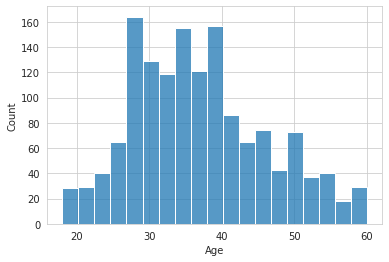

In [ ]:
df=df[df['Age']<1470]
sns.histplot(data=df,x='Age')

df.describe() method generates descriptive statistics for us. For numeric data, the
result’s index will include count , mean , std , min , max as well as lower, 50(median) and
upper percentiles.

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1472.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.13,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


If we want to see only the variable names, then we can use the df.columns method to get
all the names.

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

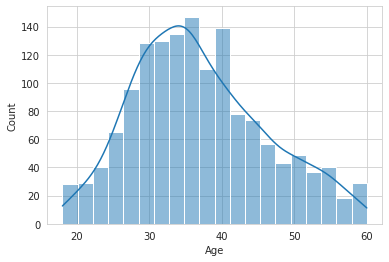

In [ ]:
ax = sns.histplot(df['Age'], bins=20,kde=True)

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.00,Yes,Travel_Rarely,1102.00,Sales,1.00,2.00,Life Sciences,1.00,1.00,2.00,Female,94.00,3.00,2.00,Sales Executive,4.00,Single,5993.00,19479.00,8.00,Y,Yes,11.00,3.00,1.00,80.00,0.00,8.00,0.00,1.00,6.00,4.00,0.00,5.00
1,49.00,No,Travel_Frequently,279.00,Research & Development,8.00,1.00,Life Sciences,1.00,2.00,3.00,Male,61.00,2.00,2.00,Research Scientist,2.00,Married,5130.00,24907.00,1.00,Y,No,23.00,4.00,4.00,80.00,1.00,10.00,3.00,3.00,10.00,7.00,1.00,7.00
2,37.00,Yes,Travel_Rarely,1373.00,Research & Development,2.00,2.00,Other,1.00,4.00,4.00,Male,92.00,2.00,1.00,Laboratory Technician,3.00,Single,2090.00,2396.00,6.00,Y,Yes,15.00,3.00,2.00,80.00,0.00,7.00,3.00,3.00,0.00,0.00,0.00,0.00
3,33.00,No,Travel_Frequently,1392.00,Research & Development,3.00,4.00,Life Sciences,1.00,5.00,4.00,Female,56.00,3.00,1.00,Research Scientist,3.00,Married,2909.00,23159.00,1.00,Y,Yes,11.00,3.00,3.00,80.00,0.00,8.00,3.00,3.00,8.00,7.00,3.00,0.00
4,27.00,No,Travel_Rarely,591.00,Research & Development,2.00,1.00,Medical,1.00,7.00,1.00,Male,40.00,3.00,1.00,Laboratory Technician,2.00,Married,3468.00,16632.00,9.00,Y,No,12.00,3.00,4.00,80.00,1.00,6.00,3.00,3.00,2.00,2.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,27.00,No,Travel_Rarely,155.00,Research & Development,4.00,3.00,Life Sciences,1.00,2064.00,2.00,Male,87.00,4.00,2.00,Manufacturing Director,2.00,Married,6142.00,5174.00,1.00,Y,Yes,20.00,4.00,2.00,80.00,1.00,6.00,0.00,3.00,6.00,2.00,0.00,3.00
1468,49.00,No,Travel_Frequently,1023.00,Sales,2.00,3.00,Medical,1.00,2065.00,4.00,Male,63.00,2.00,2.00,Sales Executive,2.00,Married,5390.00,13243.00,2.00,Y,No,14.00,3.00,4.00,80.00,0.00,17.00,3.00,2.00,9.00,6.00,0.00,8.00
1469,34.00,No,Travel_Rarely,628.00,Research & Development,8.00,3.00,Medical,1.00,2068.00,2.00,Male,82.00,4.00,2.00,Laboratory Technician,3.00,Married,4404.00,10228.00,2.00,Y,No,12.00,3.00,1.00,80.00,0.00,6.00,3.00,4.00,4.00,3.00,1.00,2.00
1471,36.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


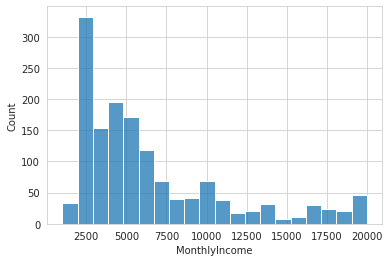

In [ ]:
f=df[df['MonthlyIncome']<1470]
sns.histplot(data=df,x='MonthlyIncome')

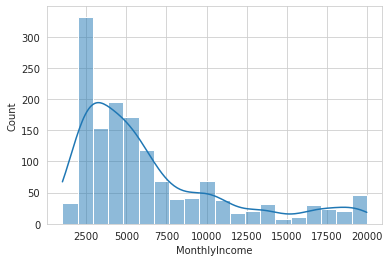

In [ ]:
ax = sns.histplot(df['MonthlyIncome'], kde=True)

In [ ]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,0.01,-0.00,0.21,NaN,-0.01,0.01,0.02,0.03,0.51,-0.00,0.50,0.03,0.30,0.00,0.00,0.05,NaN,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
DailyRate,0.01,1.00,-0.00,-0.02,NaN,-0.05,0.02,0.02,0.05,0.00,0.03,0.01,-0.03,0.04,0.02,0.00,0.01,NaN,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.02,NaN,0.03,-0.02,0.03,0.01,0.01,-0.00,-0.02,0.03,-0.03,0.04,0.03,0.01,NaN,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.02,0.02,1.00,NaN,0.04,-0.03,0.02,0.04,0.10,-0.01,0.09,-0.03,0.13,-0.01,-0.02,-0.01,NaN,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.01,-0.05,0.03,0.04,NaN,1.00,0.02,0.04,-0.01,-0.02,-0.05,-0.01,0.01,-0.00,-0.01,-0.02,-0.07,NaN,0.06,-0.01,0.02,0.01,-0.01,-0.01,-0.01,-0.01
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,NaN,0.02,1.00,-0.05,-0.01,0.00,-0.01,-0.01,0.04,0.01,-0.03,-0.03,0.01,NaN,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,0.02,0.03,0.02,NaN,0.04,-0.05,1.00,0.04,-0.03,-0.07,-0.02,-0.02,0.02,-0.01,-0.00,0.00,NaN,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,0.05,0.01,0.04,NaN,-0.01,-0.01,0.04,1.00,-0.01,-0.02,-0.02,-0.02,0.02,-0.02,-0.03,0.03,NaN,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,0.00,0.01,0.10,NaN,-0.02,0.00,-0.03,-0.01,1.00,-0.00,0.95,0.04,0.14,-0.03,-0.02,0.02,NaN,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1472
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1472 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   float64
 9   EmployeeNumber            1470 non-null   float64
 10  EnvironmentSatisfaction   1470 non-null   float64
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   float64
 13  JobInvolvement            1470 non-null   float64
 14  JobLevel

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")


Age: Number of unique values 44
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [ ]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No' nan]
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources' nan]
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources' nan]
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male' nan]
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Resear

In [ ]:
len(object_col)

8

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [ ]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0 2]
DistanceFromHome : [ 1.  8.  2.  3. 24. 23. 27. 16. 15. 26. 19. 21.  5. 11.  9.  7.  6. 10.
  4. 25. 12. 18. 29. 22. 14. 20. 28. 17. 13. nan]
Education : [ 2.  1.  4.  3.  5. nan]
EmployeeCount : [ 1. nan]
EnvironmentSatisfaction : [ 2.  3.  4.  1. nan]
JobInvolvement : [ 3.  2.  4.  1. nan]
JobLevel : [ 2.  1.  3.  4.  5. nan]
JobSatisfaction : [ 4.  2.  3.  1. nan]
NumCompaniesWorked : [ 8.  1.  6.  9.  0.  4.  5.  2.  7.  3. nan]
PercentSalaryHike : [11. 23. 15. 12. 13. 20. 22. 21. 17. 14. 16. 18. 19. 24. 25. nan]
PerformanceRating : [ 3.  4. nan]
RelationshipSatisfaction : [ 1.  4.  2.  3. nan]
StandardHours : [80. nan]
StockOptionLevel : [ 0.  1.  3.  2. nan]
TrainingTimesLastYear : [ 0.  3.  2.  5.  1.  4.  6. nan]
WorkLifeBalance : [ 1.  3.  2.  4. nan]
YearsInCurrentRole : [ 4.  7.  0.  2.  5.  9.  8.  3.  6. 13.  1. 15. 14. 16. 11. 10. 12. 18.
 17. nan]
YearsSinceLastPromotion : [ 0.  1.  3.  2.  7.  4.  8.  6.  5. 15.  9. 13. 12. 10. 11. 14. nan]
YearsWith

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              2
DailyRate                   2
Department                  2
DistanceFromHome            2
Education                   2
EducationField              2
EmployeeCount               2
EmployeeNumber              2
EnvironmentSatisfaction     2
Gender                      2
HourlyRate                  2
JobInvolvement              2
JobLevel                    2
JobRole                     2
JobSatisfaction             2
MaritalStatus               2
MonthlyIncome               2
MonthlyRate                 2
NumCompaniesWorked          2
Over18                      2
OverTime                    2
PercentSalaryHike           2
PerformanceRating           2
RelationshipSatisfaction    2
StandardHours               2
StockOptionLevel            2
TotalWorkingYears           2
TrainingTimesLastYear       2
WorkLifeBalance             2
YearsAtCompany              2
YearsInCurrentRole          2
YearsSince

In [ ]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18.0, Maximum: 60.0
DailyRate : Minimum: 102.0, Maximum: 1499.0
EmployeeNumber : Minimum: 1.0, Maximum: 2068.0
HourlyRate : Minimum: 30.0, Maximum: 100.0
MonthlyIncome : Minimum: 1009.0, Maximum: 19999.0
MonthlyRate : Minimum: 2094.0, Maximum: 26999.0
TotalWorkingYears : Minimum: 0.0, Maximum: 40.0
YearsAtCompany : Minimum: 0.0, Maximum: 40.0


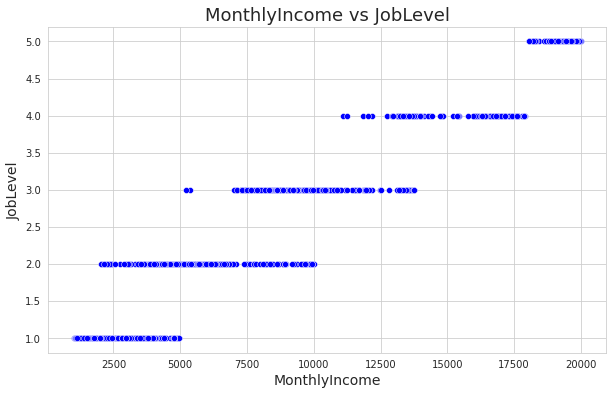

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(y='JobLevel',x='MonthlyIncome',color='b',data=df)
plt.title('MonthlyIncome vs JobLevel',size=18)
plt.ylabel('JobLevel',size=14)
plt.xlabel('MonthlyIncome',size=14)
plt.show()

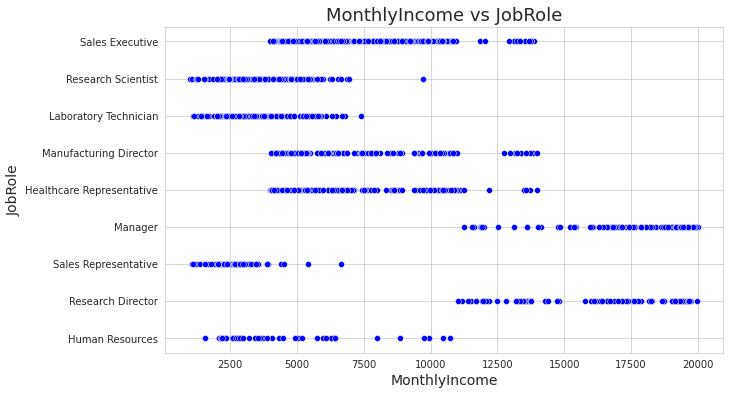

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(y='JobRole',x='MonthlyIncome',color='b',data=df)
plt.title('MonthlyIncome vs JobRole',size=18)
plt.ylabel('JobRole',size=14)
plt.xlabel('MonthlyIncome',size=14)
plt.show()

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.00,1,Travel_Rarely,1102.00,Sales,1.00,2.00,Life Sciences,1.00,1.00,2.00,Female,94.00,3.00,2.00,Sales Executive,4.00,Single,5993.00,19479.00,8.00,Y,Yes,11.00,3.00,1.00,80.00,0.00,8.00,0.00,1.00,6.00,4.00,0.00,5.00
1,49.00,0,Travel_Frequently,279.00,Research & Development,8.00,1.00,Life Sciences,1.00,2.00,3.00,Male,61.00,2.00,2.00,Research Scientist,2.00,Married,5130.00,24907.00,1.00,Y,No,23.00,4.00,4.00,80.00,1.00,10.00,3.00,3.00,10.00,7.00,1.00,7.00
2,37.00,1,Travel_Rarely,1373.00,Research & Development,2.00,2.00,Other,1.00,4.00,4.00,Male,92.00,2.00,1.00,Laboratory Technician,3.00,Single,2090.00,2396.00,6.00,Y,Yes,15.00,3.00,2.00,80.00,0.00,7.00,3.00,3.00,0.00,0.00,0.00,0.00
3,33.00,0,Travel_Frequently,1392.00,Research & Development,3.00,4.00,Life Sciences,1.00,5.00,4.00,Female,56.00,3.00,1.00,Research Scientist,3.00,Married,2909.00,23159.00,1.00,Y,Yes,11.00,3.00,3.00,80.00,0.00,8.00,3.00,3.00,8.00,7.00,3.00,0.00
4,27.00,0,Travel_Rarely,591.00,Research & Development,2.00,1.00,Medical,1.00,7.00,1.00,Male,40.00,3.00,1.00,Laboratory Technician,2.00,Married,3468.00,16632.00,9.00,Y,No,12.00,3.00,4.00,80.00,1.00,6.00,3.00,3.00,2.00,2.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,27.00,0,Travel_Rarely,155.00,Research & Development,4.00,3.00,Life Sciences,1.00,2064.00,2.00,Male,87.00,4.00,2.00,Manufacturing Director,2.00,Married,6142.00,5174.00,1.00,Y,Yes,20.00,4.00,2.00,80.00,1.00,6.00,0.00,3.00,6.00,2.00,0.00,3.00
1468,49.00,0,Travel_Frequently,1023.00,Sales,2.00,3.00,Medical,1.00,2065.00,4.00,Male,63.00,2.00,2.00,Sales Executive,2.00,Married,5390.00,13243.00,2.00,Y,No,14.00,3.00,4.00,80.00,0.00,17.00,3.00,2.00,9.00,6.00,0.00,8.00
1469,34.00,0,Travel_Rarely,628.00,Research & Development,8.00,3.00,Medical,1.00,2068.00,2.00,Male,82.00,4.00,2.00,Laboratory Technician,3.00,Married,4404.00,10228.00,2.00,Y,No,12.00,3.00,1.00,80.00,0.00,6.00,3.00,4.00,4.00,3.00,1.00,2.00
1471,36.92,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1469,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1471,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
print('There are {} unique values in JobRole'.format(df['JobRole'].nunique()))


There are 9 unique values in JobRole


In [ ]:
print ('There are {} unique value in MontlyIncome'.format(df['MonthlyIncome'].nunique()))

There are 1349 unique value in MontlyIncome


In [ ]:
df.nunique()

Age                           44
Attrition                      3
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
df.shape

(1472, 35)

In [ ]:
df['EducationField'].nunique()

6

In [ ]:
df['Attrition'].nunique()

3

In [ ]:
# How the employees destrbuited according to their education level?

Education_counts = df['EducationField'].value_counts()
Education_counts.head()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Name: EducationField, dtype: int64

In [ ]:
Departments_counts = df['Department'].value_counts()
Departments_counts.head()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [ ]:
Maritalstatus_counts= df['MaritalStatus'].value_counts()
Maritalstatus_counts.head()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [ ]:
JobLevel_counts = df['JobLevel'].value_counts()
JobLevel_counts.head() 

1.00    543
2.00    534
3.00    218
4.00    106
5.00     69
Name: JobLevel, dtype: int64

In [ ]:
JobRole_counts = df['JobRole'].value_counts()
JobRole_counts.head()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Name: JobRole, dtype: int64

In [ ]:
PerformanceRating_counts = df['PerformanceRating'].value_counts()
PerformanceRating_counts.head()

3.00    1244
4.00     226
Name: PerformanceRating, dtype: int64

In [ ]:
WorkLifeBalance_counts = df['WorkLifeBalance'].value_counts()
WorkLifeBalance_counts.head()

3.00    893
2.00    344
4.00    153
1.00     80
Name: WorkLifeBalance, dtype: int64

In [ ]:
Education_counts = df['Education'].value_counts()
Education_counts.head()

3.00    572
4.00    398
2.00    282
1.00    170
5.00     48
Name: Education, dtype: int64

In [ ]:
# find null value accross all columns in the dataframe
null_rows = df[df.isnull().any(axis=1)]
null_rows.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1471,36.92,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1472,37.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# find the null in the rows.
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 1471 to 1472
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2 non-null      float64
 1   Attrition                 2 non-null      int64  
 2   BusinessTravel            0 non-null      object 
 3   DailyRate                 0 non-null      float64
 4   Department                0 non-null      object 
 5   DistanceFromHome          0 non-null      float64
 6   Education                 0 non-null      float64
 7   EducationField            0 non-null      object 
 8   EmployeeCount             0 non-null      float64
 9   EmployeeNumber            0 non-null      float64
 10  EnvironmentSatisfaction   0 non-null      float64
 11  Gender                    0 non-null      object 
 12  HourlyRate                0 non-null      float64
 13  JobInvolvement            0 non-null      float64
 14  JobLevel

In [ ]:
# Print the original size of the DataFrame
print(df.size)

# Drop `NaN` rows
clean_df = df.dropna()

# Print the size of the modified DataFrame
print(clean_df.size)

51520
51450


In [ ]:
def series_statistics(column):
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

In [ ]:
series_statistics(df['Age'])

statistics for column: Age
The max value in the column: 60.0
The min value in the column: 18.0
The mode value in the column: 0   35.00
dtype: float64
The median value in the column: 36.0
The mean of the column: 36.9238612836413
The std of the column: 9.12916127768955


In [ ]:
series_statistics(df['MonthlyIncome'])

statistics for column: MonthlyIncome
The max value in the column: 19999.0
The min value in the column: 1009.0
The mode value in the column: 0   2342.00
dtype: float64
The median value in the column: 4919.0
The mean of the column: 6502.931292517007
The std of the column: 4707.956783097995


In [ ]:
df['Age'].describe()

count   1472.00
mean      36.92
std        9.13
min       18.00
25%       30.00
50%       36.00
75%       43.00
max       60.00
Name: Age, dtype: float64

In [ ]:
clean_df['MonthlyIncome'].describe()

count    1470.00
mean     6502.93
std      4707.96
min      1009.00
25%      2911.00
50%      4919.00
75%      8379.00
max     19999.00
Name: MonthlyIncome, dtype: float64

In [ ]:
clean_df['YearsAtCompany'].describe()

count   1470.00
mean       7.01
std        6.13
min        0.00
25%        3.00
50%        5.00
75%        9.00
max       40.00
Name: YearsAtCompany, dtype: float64

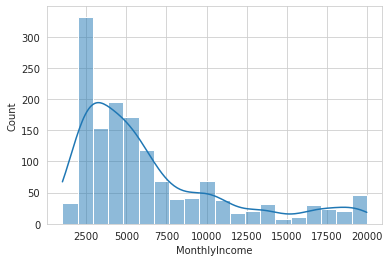

In [ ]:
ax = sns.histplot(clean_df['MonthlyIncome'], bins=20, kde= True)

In [ ]:
clean_df[['MonthlyIncome','YearsAtCompany']].describe()

,MonthlyIncome,YearsAtCompany
count,1470.00,1470.00
mean,6502.93,7.01
std,4707.96,6.13
min,1009.00,0.00
25%,2911.00,3.00
50%,4919.00,5.00
75%,8379.00,9.00
max,19999.00,40.00


In [ ]:
clean_df['DistanceFromHome'].describe() 

count   1470.00
mean       9.19
std        8.11
min        1.00
25%        2.00
50%        7.00
75%       14.00
max       29.00
Name: DistanceFromHome, dtype: float64

In [ ]:
clean_df[['MonthlyIncome','YearsAtCompany','DistanceFromHome']].corr()

,MonthlyIncome,YearsAtCompany,DistanceFromHome
MonthlyIncome,1.00,0.51,-0.02
YearsAtCompany,0.51,1.00,0.01
DistanceFromHome,-0.02,0.01,1.00


In [ ]:
clean_df['MonthlyIncome'].corr(clean_df['YearsAtCompany'])

0.5142848257331966

The correlation between MonthlyIncome and YearsAtCompany is 0.50 which implies that there is some positive correlation between these two columns. If Monthly income increase, the employees is more likely to stay at the company.

In [ ]:
clean_df['YearsAtCompany'].corr(clean_df['DistanceFromHome'])

0.009507719899011297

This value is close to 0, which implies that there is no relationship between the YearsAtCompany and DistanceFromHome.


In [ ]:
stats.pearsonr(clean_df['YearsAtCompany'], clean_df['DistanceFromHome'])

(0.009507719899011264, 0.7156865495367134)

Two values 0.009507719899011264 is correlation and the second one 0.7156865495367134 is p-value.

In [ ]:
stats.pearsonr(clean_df['MonthlyIncome'],clean_df['YearsAtCompany'])

(0.5142848257331967, 4.819313789732479e-100)

In [ ]:
# t-test for independent samples

JobLevel_1 = clean_df.iloc[(clean_df['JobLevel'] == 1).values]
JobLevel_1.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 2 to 1464
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       543 non-null    float64
 1   Attrition                 543 non-null    int64  
 2   BusinessTravel            543 non-null    object 
 3   DailyRate                 543 non-null    float64
 4   Department                543 non-null    object 
 5   DistanceFromHome          543 non-null    float64
 6   Education                 543 non-null    float64
 7   EducationField            543 non-null    object 
 8   EmployeeCount             543 non-null    float64
 9   EmployeeNumber            543 non-null    float64
 10  EnvironmentSatisfaction   543 non-null    float64
 11  Gender                    543 non-null    object 
 12  HourlyRate                543 non-null    float64
 13  JobInvolvement            543 non-null    float64
 14  JobLevel 

In [ ]:
JobLevel_3 = clean_df.iloc[(clean_df['JobLevel'] == 3).values]
JobLevel_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 8 to 1466
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       218 non-null    float64
 1   Attrition                 218 non-null    int64  
 2   BusinessTravel            218 non-null    object 
 3   DailyRate                 218 non-null    float64
 4   Department                218 non-null    object 
 5   DistanceFromHome          218 non-null    float64
 6   Education                 218 non-null    float64
 7   EducationField            218 non-null    object 
 8   EmployeeCount             218 non-null    float64
 9   EmployeeNumber            218 non-null    float64
 10  EnvironmentSatisfaction   218 non-null    float64
 11  Gender                    218 non-null    object 
 12  HourlyRate                218 non-null    float64
 13  JobInvolvement            218 non-null    float64
 14  JobLevel 

In [ ]:
stats.ttest_ind(JobLevel_1['MonthlyIncome'], JobLevel_3['MonthlyIncome'])

Ttest_indResult(statistic=-75.95235250909614, pvalue=0.0)

There is a difference of 75.95 standard deviations between these two means. The p-value is extremely small and rounded to 0.0, implying that this is a real difference.

In [ ]:
#t-test between salaried depending on Education
Education_1 = clean_df.iloc[(clean_df['Education'] == 1).values]
Education_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 1 to 1466
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       170 non-null    float64
 1   Attrition                 170 non-null    int64  
 2   BusinessTravel            170 non-null    object 
 3   DailyRate                 170 non-null    float64
 4   Department                170 non-null    object 
 5   DistanceFromHome          170 non-null    float64
 6   Education                 170 non-null    float64
 7   EducationField            170 non-null    object 
 8   EmployeeCount             170 non-null    float64
 9   EmployeeNumber            170 non-null    float64
 10  EnvironmentSatisfaction   170 non-null    float64
 11  Gender                    170 non-null    object 
 12  HourlyRate                170 non-null    float64
 13  JobInvolvement            170 non-null    float64
 14  JobLevel 

In [ ]:
Education_3 = clean_df.iloc[(clean_df['Education'] == 3).values]
Education_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 6 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       572 non-null    float64
 1   Attrition                 572 non-null    int64  
 2   BusinessTravel            572 non-null    object 
 3   DailyRate                 572 non-null    float64
 4   Department                572 non-null    object 
 5   DistanceFromHome          572 non-null    float64
 6   Education                 572 non-null    float64
 7   EducationField            572 non-null    object 
 8   EmployeeCount             572 non-null    float64
 9   EmployeeNumber            572 non-null    float64
 10  EnvironmentSatisfaction   572 non-null    float64
 11  Gender                    572 non-null    object 
 12  HourlyRate                572 non-null    float64
 13  JobInvolvement            572 non-null    float64
 14  JobLevel 

In [ ]:
stats.ttest_ind(Education_1['MonthlyIncome'], Education_3['MonthlyIncome'])

Ttest_indResult(statistic=-2.115803847475836, pvalue=0.0346949276239694)

There is a difference of 2.11 standard deviations between these two means. The p-value is extremely small 0.03, implying that this is a real difference.The salaris changes dependong on education level. 

In [ ]:
# Calculate the sample size, mean, and variance of each sample.
# You will need this information to calculate standard errors.

sample_1_n = JobLevel_1.shape[0]
sample_2_n = JobLevel_3.shape[0]
sample_1_mean = JobLevel_1['MonthlyIncome'].mean()
sample_2_mean = JobLevel_3['MonthlyIncome'].mean()
sample_1_var = JobLevel_1['MonthlyIncome'].var()
sample_2_var = JobLevel_3['MonthlyIncome'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 6782.462758192018 and 7278.21125806155.


In [ ]:
# Calculate the standard error and compute the confidence intervals(Another way).
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(JobLevel_1['MonthlyIncome'], JobLevel_3['MonthlyIncome'])

'The difference in means at the 95% confidence interval (two-tail) is between 6782.462758192018 and 7278.21125806155.'

Using the confidence interval, we can quantify the difference between joblevel_1 and joblevel_3as likely being between $6,782,00 and 7,278,00—that's a solid effect size!

In [ ]:
# Calculate the sample size, mean, and variance of each sample(Educationlevel).
# You will need this information to calculate standard errors.

sample_1_n = Education_1.shape[0]
sample_2_n = Education_3.shape[0]
sample_1_mean = Education_1['MonthlyIncome'].mean()
sample_2_mean = Education_3['MonthlyIncome'].mean()
sample_1_var = Education_1['MonthlyIncome'].var()
sample_2_var = Education_3['MonthlyIncome'].var()

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(Education_1['MonthlyIncome'], Education_3['MonthlyIncome'])

'The difference in means at the 95% confidence interval (two-tail) is between 95.46481364076124 and 1657.9219819166228.'

Using the confidence interval, you can quantify the difference between Education_1 and Education_3 as likely being between 
95.46481364076124 and 1657.9219819166228that's a solid effect size!

In [ ]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,0.01,-0.00,0.21,NaN,-0.01,0.01,0.02,0.03,0.51,-0.00,0.50,0.03,0.30,0.00,0.00,0.05,NaN,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
DailyRate,0.01,1.00,-0.00,-0.02,NaN,-0.05,0.02,0.02,0.05,0.00,0.03,0.01,-0.03,0.04,0.02,0.00,0.01,NaN,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.02,NaN,0.03,-0.02,0.03,0.01,0.01,-0.00,-0.02,0.03,-0.03,0.04,0.03,0.01,NaN,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.02,0.02,1.00,NaN,0.04,-0.03,0.02,0.04,0.10,-0.01,0.09,-0.03,0.13,-0.01,-0.02,-0.01,NaN,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.01,-0.05,0.03,0.04,NaN,1.00,0.02,0.04,-0.01,-0.02,-0.05,-0.01,0.01,-0.00,-0.01,-0.02,-0.07,NaN,0.06,-0.01,0.02,0.01,-0.01,-0.01,-0.01,-0.01
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,NaN,0.02,1.00,-0.05,-0.01,0.00,-0.01,-0.01,0.04,0.01,-0.03,-0.03,0.01,NaN,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,0.02,0.03,0.02,NaN,0.04,-0.05,1.00,0.04,-0.03,-0.07,-0.02,-0.02,0.02,-0.01,-0.00,0.00,NaN,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,0.05,0.01,0.04,NaN,-0.01,-0.01,0.04,1.00,-0.01,-0.02,-0.02,-0.02,0.02,-0.02,-0.03,0.03,NaN,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,0.00,0.01,0.10,NaN,-0.02,0.00,-0.03,-0.01,1.00,-0.00,0.95,0.04,0.14,-0.03,-0.02,0.02,NaN,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   float64
 9   EmployeeNumber            1470 non-null   float64
 10  EnvironmentSatisfaction   1470 non-null   float64
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   float64
 13  JobInvolvement            1470 non-null   float64
 14  JobLevel

In [ ]:
clean_df[['MonthlyIncome', 'Age','YearsAtCompany','TotalWorkingYears']].describe()

,MonthlyIncome,Age,YearsAtCompany,TotalWorkingYears
count,1470.00,1470.00,1470.00,1470.00
mean,6502.93,36.92,7.01,11.28
std,4707.96,9.14,6.13,7.78
min,1009.00,18.00,0.00,0.00
25%,2911.00,30.00,3.00,6.00
50%,4919.00,36.00,5.00,10.00
75%,8379.00,43.00,9.00,15.00
max,19999.00,60.00,40.00,40.00


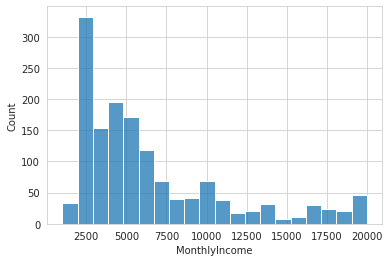

In [ ]:
ax = sns.histplot(clean_df['MonthlyIncome'], bins=20)

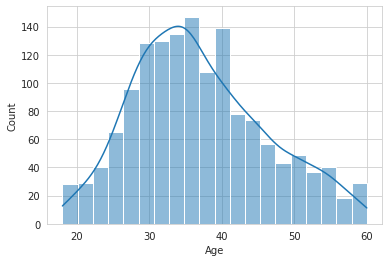

In [ ]:
ax = sns.histplot(clean_df['Age'], bins=20,kde=True)

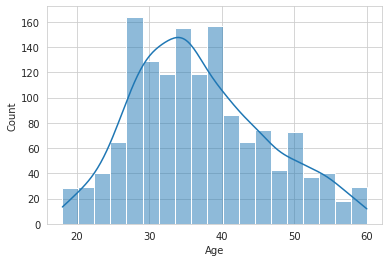

In [ ]:
ax = sns.histplot(clean_df['Age'], kde=True)

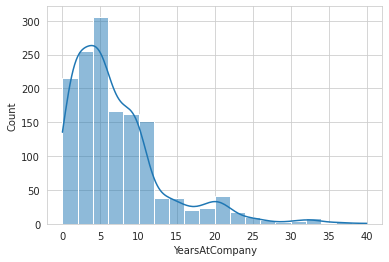

In [ ]:

X = sns.histplot(clean_df['YearsAtCompany'],bins=20,kde=True)


In [ ]:
Salary_Education_1= Education_1['MonthlyIncome']
print(Salary_Education_1)

1       5130.00
4       3468.00
7       2693.00
12      2911.00
24      2960.00
         ...   
1421   11957.00
1429    4108.00
1436    2380.00
1462   12031.00
1466    9991.00
Name: MonthlyIncome, Length: 170, dtype: float64


In [ ]:
Salary_Education_3= Education_3['MonthlyIncome']
print(Salary_Education_3)


6      2670.00
8      9526.00
9      5237.00
10     2426.00
14     2028.00
         ...  
1463   9936.00
1464   2966.00
1467   6142.00
1468   5390.00
1469   4404.00
Name: MonthlyIncome, Length: 572, dtype: float64


Comparing the distribution of two variables

Text(0.5, 1.0, 'MonthlyIncome vs TotalWorkingYears')

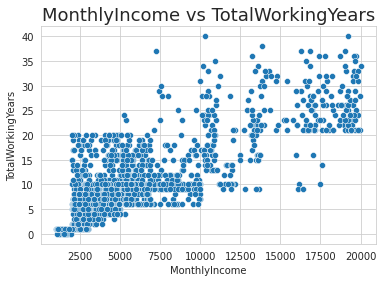

In [ ]:
sns.scatterplot(x='MonthlyIncome', y='TotalWorkingYears', data=clean_df)
plt.title('MonthlyIncome vs TotalWorkingYears',size=18)

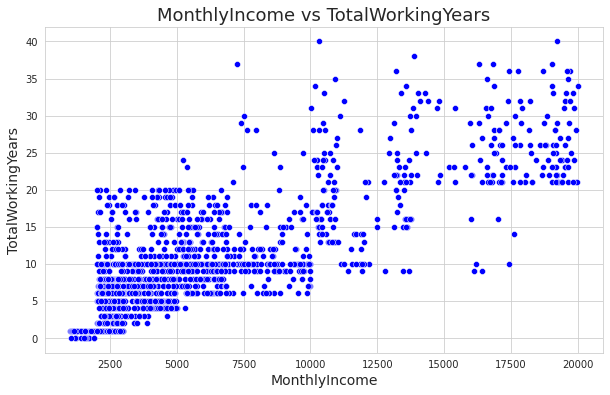

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x= 'MonthlyIncome',y='TotalWorkingYears',color='b',data=clean_df)
plt.title('MonthlyIncome vs TotalWorkingYears',size=18)
plt.xlabel('MonthlyIncome',size=14)
plt.ylabel('TotalWorkingYears',size=14)
plt.show()

Text(0.5, 1.0, 'MonthlyIncome vs Education')

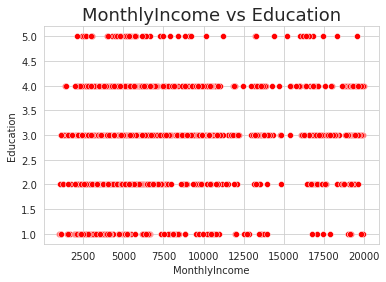

In [ ]:
sns.scatterplot(x= 'MonthlyIncome',y='Education',color='r',data=clean_df)
plt.title('MonthlyIncome vs Education',size=18)


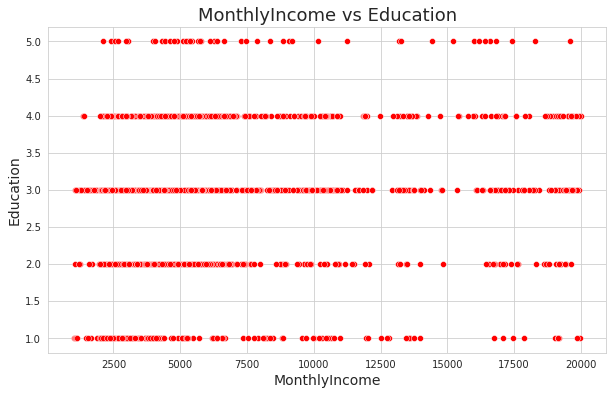

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x= 'MonthlyIncome',y='Education',color='r',data=clean_df)
plt.title('MonthlyIncome vs Education',size=18)
plt.xlabel('MonthlyIncome',size=14)
plt.ylabel('Education',size=14)
plt.show()

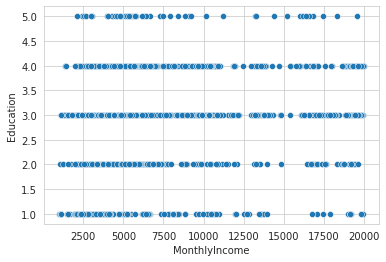

In [ ]:
sns.scatterplot(x="MonthlyIncome", y="Education", data=clean_df)

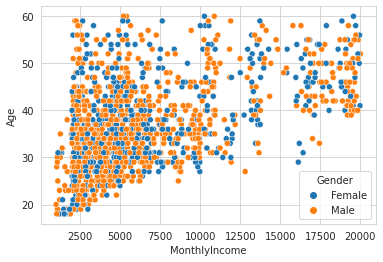

In [ ]:
sns.scatterplot(x="MonthlyIncome", y="Age", hue = "Gender", data=clean_df)

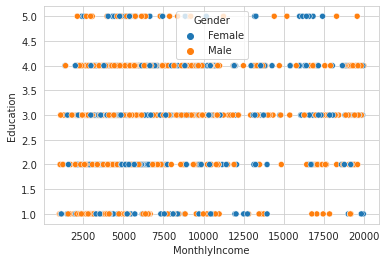

In [ ]:
sns.scatterplot(x="MonthlyIncome", y="Education", hue = "Gender", data=clean_df)

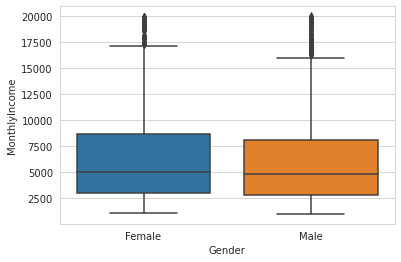

In [ ]:
sns.boxplot(y="MonthlyIncome", x="Gender", data=clean_df)

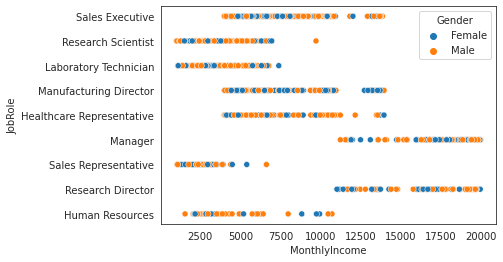

In [ ]:
sns.set_style("white")
sns.scatterplot(x="MonthlyIncome", y="JobRole", hue="Gender", data=clean_df)

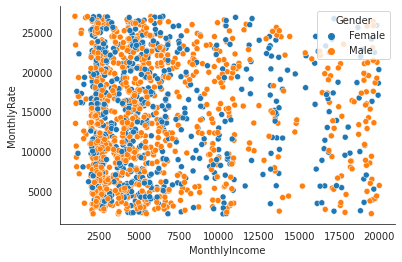

In [ ]:
sns.scatterplot(x="MonthlyIncome", y="MonthlyRate", hue="Gender", data=clean_df)
sns.despine()

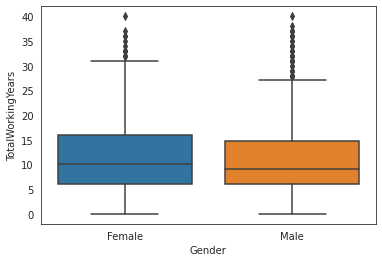

In [ ]:
sns.boxplot(y="TotalWorkingYears", x="Gender", data=clean_df)

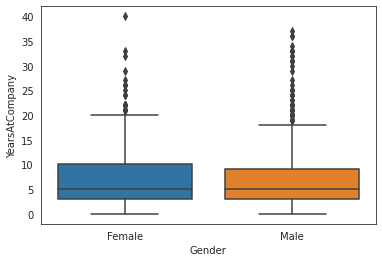

In [ ]:
sns.boxplot(y="YearsAtCompany", x="Gender", data=clean_df)

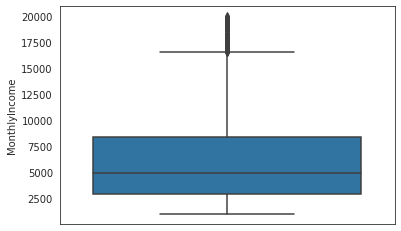

In [ ]:
sns.boxplot(y="MonthlyIncome", data=clean_df)

[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0')]

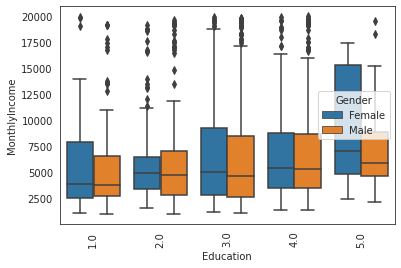

In [ ]:
#How are MonthlyIncome affected by employee education by gender? 
#To properly display the labels on the x-axis, you will have to rotate them.
ax = sns.boxplot(y="MonthlyIncome", hue="Gender", x = "Education", data=clean_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


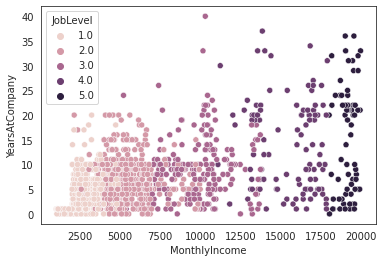

In [ ]:
sns.set_style("white")
sns.scatterplot(x="MonthlyIncome", y="YearsAtCompany", hue="JobLevel", data=clean_df)



## ***Capstone 3 Haypotheses***




Problem Background:
Quitting the job seems to be spreading over the world, workers or employees who quit their jobs in the past years were more likely to have similar problems. Here is a short proposal that focuses on this problem.  In this research, I will shed a light on the most popular factors that push workers or employees quit their jobs. 

Research Questions and Hypotheses
I select one main question and five sub-questions:

Main Research question: 

1.  What factors encourage employees to stay at the company?

Sub questions:

1.a. Is the employees’ monthly income affect employees’ decision on staying in the company or leaving it?
1.b. Is the employees’ Job Level affect employees’ decision on staying in the company or leaving it?


• Hypothesis #1 My first hypothesis: there is a correlation between total years at the company, job level, and monthly income.

• Hypothesis #2:  Different job roles don’t significantly affect employees’ staying at the company.


1.c. Is the employees’ living location affect employees’ decision on staying in the company or leaving it? I assumed the employees have their transportation and there is no problem reaching the job at a time. 

• Hypothesis#3 Distance from Home doesn’t significantly impact staying at the company.
1.d. Are employees with long years working within the same company committed to the company and staying at it more than those who don’t have long years with the company?


• Hypothesis#4: Total Working Years don’t significantly impact employees staying at the company.
1e. Are employees with high education levels committed to the company more than those with lower education levels?


• Hypothesis#5: Education level doesn’t have a significant impact on employees’ years at the company.

Data Analysis Strategies:
I will use visualizations to show correlation, and I’ll use t-tests to test the significant difference between the variables according to my sub-questions and hypotheses.

Research positive change:

This short analysis will assist Human Resources will to discover the reasons that make their employees quit their job, and build some effective strategies that keep their employees within their organization, especially those with low-level jobs, low education, and low salary. 

Conclusion:
Employees with low JobLevel, MonthlyIncome, low YearAtCompany and low TotalWorkingYears are more likely to quit their jobs.

Recommendation:
Human Resources need to make an effort to raise their employees commitment to the organization. From the analysis above it seems that workers with a low level of education, low income, and low job role are most likely to quit their jobs. Therefore, there needs to be a plan in place to develop the knowledge or education level of workers and increase their commitment to the organization such as offering training or encouraging workers to continue their higher education to up their skills. Salary is a critical point to keeping the employees commitment to the company. Therefore there needs to provide employees with competitive pay especially after finishing the training or during enrolling in the college to continue their education. Employees are the backbone of the company and taking care of them will encourage the employees to stay at the organization and raise their commitment to it especially when they feel their company cares about their future. 

Future Research:
There needs to analyze more variables and check their impact on employees staying at a company such as performance rate, environment satisfaction, Worklife-balanced.  




Data Descriptions:

Education:
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

Job Role:

1.00    Sales Representative 

2.00    
3.00    
4.00    
5.00     Manager



**Hypothesis #1 My first hypothesis: there is a correlation between total years at the company, job level, and monthly income..**

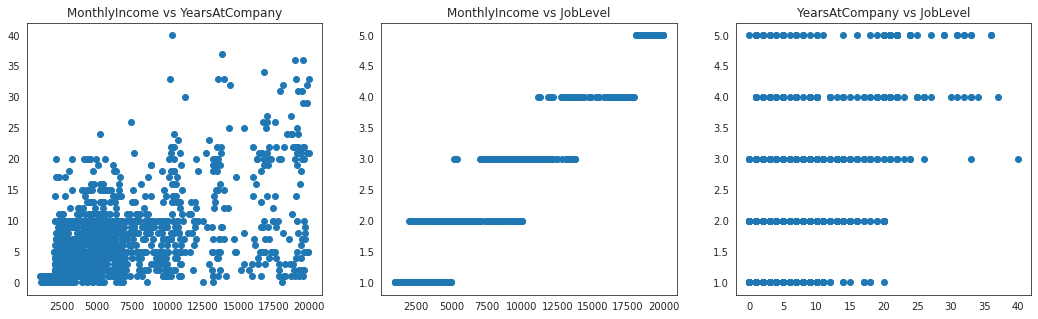

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(clean_df["MonthlyIncome"], clean_df["YearsAtCompany"])
plt.title("MonthlyIncome vs YearsAtCompany")

plt.subplot(1,3,2)
plt.scatter(clean_df["MonthlyIncome"], clean_df["JobLevel"])
plt.title("MonthlyIncome vs JobLevel")

plt.subplot(1,3,3)
plt.scatter(clean_df["YearsAtCompany"], clean_df["JobLevel"])
plt.title("YearsAtCompany vs JobLevel")

plt.show()

Summary of findings for hypothesis #1:There is a positive correlation between MonthlyIncome, YearsAtCompany
If the monthly income increases, then the employees mostly are staying in the company.
The correlation between monthly income and YearsAtCompany is 0.50 which implies that there is some positive correlation between these two columns. If Monthly income increase, the employees is more likely to stay at the company.


**Hypothesis #2 There is no impact on employees’ Job Roles on staying at the same company long time.**

In [ ]:
clean_df.groupby("JobRole").mean()[["YearsAtCompany"]]


,YearsAtCompany
JobRole,
Healthcare Representative,8.37
Human Resources,5.33
Laboratory Technician,5.02
Manager,14.43
Manufacturing Director,7.60
Research Director,10.94
Research Scientist,5.11
Sales Executive,7.50
Sales Representative,2.92


In [ ]:
stats.ttest_ind(clean_df[clean_df.JobRole == "Manager"][[ "YearsAtCompany"]],
          clean_df[clean_df.JobRole == "Sales Representative"][["YearsAtCompany"]])




Ttest_indResult(statistic=array([10.03261788]), pvalue=array([3.75925741e-19]))

Summary of findings for hypothesis #2
The Hypothesis is rejected.
The t-test shows that there is a significant difference between  YearsAtCompany for different Job Role types. This means that employee in management roles (higher Job level) stay at the company more than those who are at entry-level job role (Low JobLevel) such as Sales Representative.



**Hypothesis#3** 
**# Distance from Home has no impact on staying at the company.** 


In [ ]:
clean_df.groupby("DistanceFromHome").mean()[["YearsAtCompany"]]


,YearsAtCompany
DistanceFromHome,
1.00,7.18
2.00,7.18
3.00,6.36
4.00,7.50
5.00,6.37
6.00,7.46
7.00,7.62
8.00,6.90
9.00,6.26


In [ ]:
stats.ttest_ind(clean_df[clean_df.DistanceFromHome == 5][["YearsAtCompany"]],
          clean_df[clean_df.DistanceFromHome == 20 ][["YearsAtCompany"]])


Ttest_indResult(statistic=array([-0.50877529]), pvalue=array([0.61218299]))

There is no correlation between "DistanceFromHome" and the years staying at company. There is no big impact for "DistanceFromHome" on employees staying at company. The correleation between distance from home and staying at company is weak.It fails to reject the null.

 
** Hypothesis#4 **

**Total Working Years don’t significantly impact employees staying at the company.**


In [ ]:
clean_df.groupby("TotalWorkingYears").mean()[["YearsAtCompany"]]


NameError: ignored

In [ ]:
stats.ttest_ind(clean_df[clean_df.TotalWorkingYears == 20][["YearsAtCompany"]],
          clean_df[clean_df.TotalWorkingYears == 7 ][["YearsAtCompany"]])

Ttest_indResult(statistic=array([7.67892848]), pvalue=array([7.37511896e-12]))

Summary of findings for hypothesis #4 The Hypothesis is rejected. The t-test shows that there is a significant difference between TotalWorkingYears and YearsAtCompany for employees by gender. 

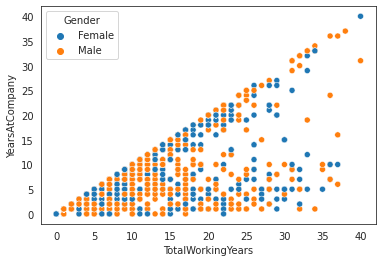

In [ ]:
sns.set_style("white")
sns.scatterplot(x="TotalWorkingYears", y="YearsAtCompany", hue="Gender", data=clean_df)

# Hypothesis#5 

**Education level doesn’t have a significant impact on employees’ years at the company.**


In [ ]:
clean_df.groupby("Education").mean()[["YearsAtCompany"]]


,YearsAtCompany
Education,
1.00,6.49
2.00,6.61
3.00,6.86
4.00,7.56
5.00,8.35


In [ ]:
stats.ttest_ind(clean_df[clean_df.Education == 5][["YearsAtCompany"]],
          clean_df[clean_df.Education == 1 ][["YearsAtCompany"]])

Ttest_indResult(statistic=array([1.70096393]), pvalue=array([0.09038886]))

Summary of findings for hypothesis #5 The Hypothesis is rejected. The t-test shows that there is a significant difference between emplyee Education and emmploee YearsAtCompany.


  **Hypothese#6** 

**The employee gender has no impact on staying at the company.**

> 



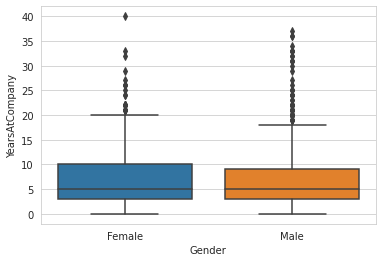

In [ ]:
sns.boxplot(y="YearsAtCompany", x="Gender", data=clean_df)

In [ ]:
clean_df.groupby("Gender").mean()[["YearsAtCompany"]]

,YearsAtCompany
Gender,
Female,7.23
Male,6.86


In [ ]:
stats.ttest_ind(clean_df[clean_df.Gender == 'Male'][["YearsAtCompany"]],
          clean_df[clean_df.Gender == 'Female'][["YearsAtCompany"]])

Ttest_indResult(statistic=array([-1.14024898]), pvalue=array([0.25436858]))

There is a differences between the male and female mean related to years at company 1.14024898 but the p-value is greater than alpha 0.25 therefore there is no statistically differences and we can not reject the null.